# Klasterovanje

Sadržaj sveske: 

1. Šta je klasterovanje
2. K-means
3. Bisecting K-means
4. Fuzzy C-means


**Klasterovanje** se može definisati kao problem identifikacije grupa u podacima na način da su elementi u jednoj grupi(klasteru) jako slični, dok su elementi iz različitih klastera veoma različiti. Sličnost/različitost su predstavljeni nekom merom sličnosti/različitosti (npr. euklidsko rastojanje, varijansa...). Odluka koja mera sličnosti će biti korišćena zavisi od upotrebe.

Klasterovanje spada u metodu _nenadgledanog učenja_, sa obzirom na to da nemamo informacije o klasterima u kojima se nalaze instance na osnovu kojih bismo evaluirali performanse.


Pojam klasterovanja nije jednoznačno definisan. U jednom skupu se može identifikovati više različitih grupisanja.
![](Downloads/OIP.jfif)

Pojam klasterovanja nije jednoznačno definisan ne samo u odnosu na broj
klastera koji se u podacima mogu naći, već i u odnosu na to kako definišemo klastere.
Neke od vrsta su:  (Napomena: Ovde navodimo samo vrste koje će biti pokrivene na važbama)

* globularni
* gustinski
* dobro razdvojeni
* hijerarhijski
* fuzzy
* .....


## K-means

Metoda zasnovana na reprezentativnim predstavnicima. Vrši podelu podataka na disjunktne klastere.
Najpopularnije tehnike:

* K-means
* K-medoid 

K-means definiše predstavnika kao centroidu (najčeće usrednjena vrednost elemenata klastera), dok K-medoid definiše predstavnika kao medoidu (mora da bude tačka iz podataka!)

U nastavku ćemo se baviti K-means algoritmom, dok istraživanje o K-medoid ostaje za domaći [literatura](https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html). 


K-means je jedna od najstarijih i najšire korišćenih algoritama za klasterovanje.

K-means predstavlja **iterativni** algoritam koji deli podatke u _K_ klastera (**broj klastera unapred definisan**).
Svaka tačka pripada **tačno jednom klasteru**.

Dodeljuje instance klasterima na način da suma kvadrata rastojanja između tačaka iz klastera i centroide bude što manja.
 Ova pretpostavka čini algoritam primenljivim samo na
podatke koji se mogu uprosečavati, poput vektora. 

Polaznih _k_ centroida se bira nasumično (mada, ako znamo nešto o
strukturi podataka, možemo ih i unapred zadati), a potom se ponavljaju
sledeći koraci:

1. rasporediti sve instance u nove klastere tako što se svaka instanca pridruži najbližoj centoridi
2. izračunati nove centroide kao prosek instanci koje su im pridružene.

Ovi koraci se izvršavaju sve dok se centroide menjaju. Kada su centroide iste
u dve uzastopne iteracije, algoritam se zaustavlja.

U okviru ovog algoritma se vrši minimizacija _Sum of squared errors_:

$
SSE = \sum_{i=1}^{k}\sum_{x\in C_i} d(x, c_i)^2
$
po $ c_i $, gde je **_d_** euklidsko rastojanje (ali je moguće koristiti i neko drugo).

### Pozitivne strane

 * 👍 Jednostavan, fleksibilan, efikasan. 
 * 👍 Jednostavan za interpretaciju.


### Potencijalni problemi
 * 🤔 -> 👍 _Da li postoji više jednako dobrih klastera (da li postoji više globalnih minimuma?)_ - Da, može biti više jednako dobrih podela (više globalnih minimuma).
 * 🤔 -> 💡 -> 👍   _Da li se prilikom minimizacije možemo zaglaviti u lokalnom minimumu?_ - Da, što može biti problem, ali ga rešavamo pokretanjem algoritma više puta.
 * 🤔 Pronalazi globularne klastere - ako minimizujemo eulidsko rastojanje. (može da bude problem, zavisi od problema koji rešavamo).
 * 🤔 Kako izabrati _k_?
 * 👎 Osetljiv na autjalere - zbog kvadriranja euklidskog rastojanja.

### Primer 1 - Klasterovanje pasa

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

U uvodnom primeru ćemo koristiti skup podataka _dogs_.

In [2]:
dogs = pd.read_csv('datasets/dogs.csv')
dogs

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8
5,German Shepherd,25,78
6,Golden Retriever,23,70
7,Great Dane,32,160
8,Portuguese Water Dog,21,50
9,Standard Poodle,19,65


Pošto postoje dva numerička atributa, možemo ih i vizuelizovati. 

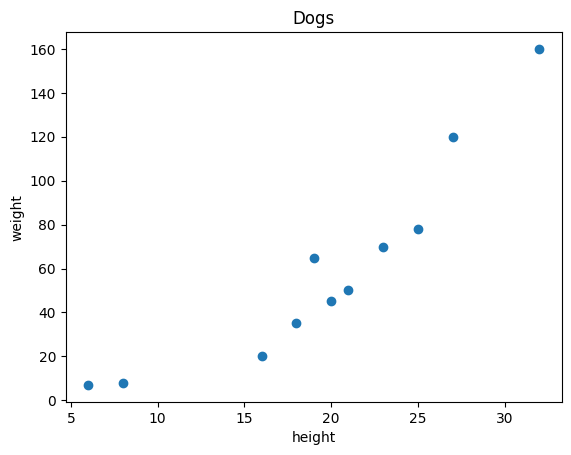

In [3]:
plt.scatter(dogs['height'], dogs['weight'])
plt.xlabel('height')
plt.ylabel('weight')
plt.title("Dogs")
plt.show()

Klasterovanje ćemo izvršiti na osnovu atributa _height_ i _weight_.

In [4]:
feature_names = dogs.columns[1:]
feature_names

Index(['height', 'weight'], dtype='object')

In [5]:
X = dogs[feature_names]
X

,height,weight
0,20,45
1,16,20
2,18,35
3,27,120
4,8,8
5,25,78
6,23,70
7,32,160
8,21,50
9,19,65


❔ Da li je potrebno izvršiti normalizaciju prilikom korišćenja K-means? (Da, zašto?)

Da, normalizacija je potrebna prilikom korišćenja K-means algoritma jer omogućava da sve dimenzije podataka imaju jednak uticaj na formiranje klastera, čime se osigurava pravednija procena udaljenosti između tačaka. Takođe, normalizacija olakšava konvergenciju algoritma i poboljšava performanse grupisanja.

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()

```
scaler.fit(X)
X = scaler.transform(X)
X
```
_ekvivalentno je sa:_
```
X = scaler.fit_transform(X)
X
```

In [8]:
X = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)
X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


Nakon normalizacije vršimo klasterovanje u 2 klastera, koristeći algoritam K-means.

In [9]:
from sklearn.cluster import KMeans
import numpy as np

[0.8479588365514269, 0.2459264616238266, 0.13117996454102393, 0.120689775203202, 0.02728421771393408, 0.01951979392608735, 0.014867130370043452, 0.004253566814564059, 0.001273627626657521, 0.0]


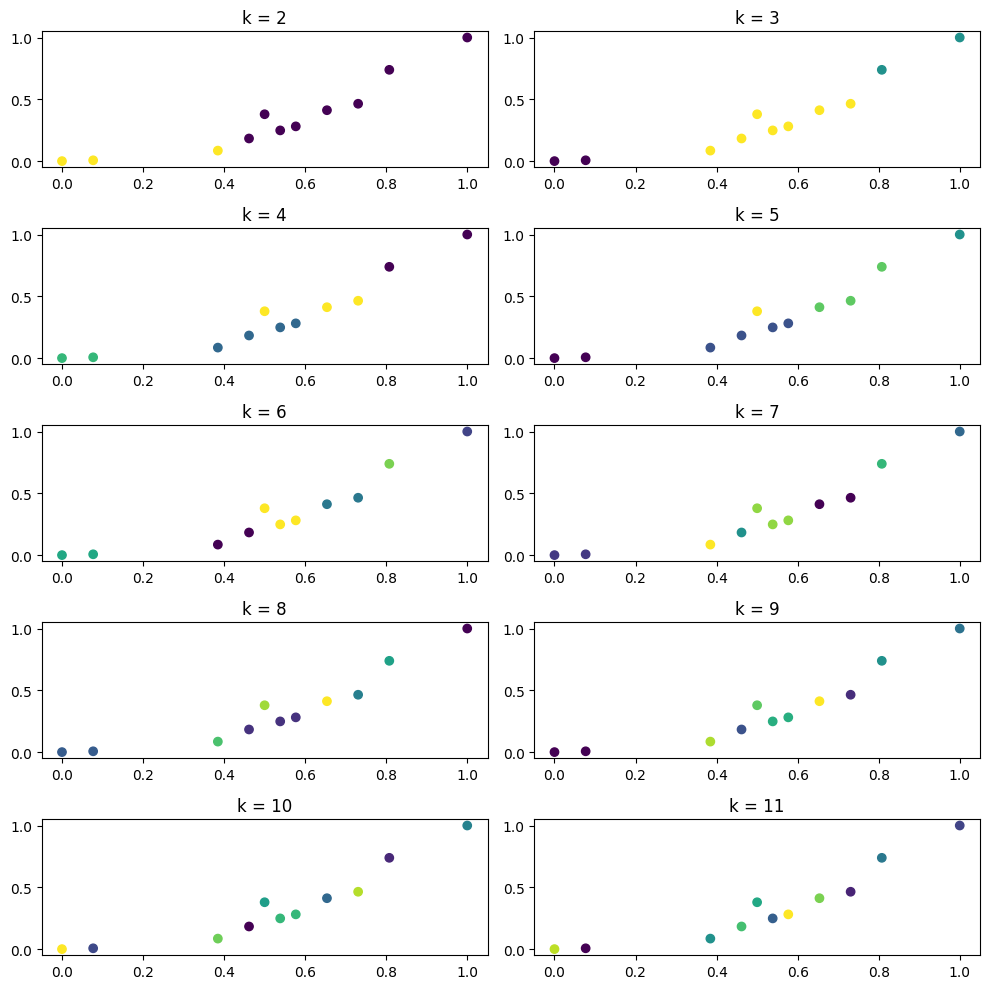

In [10]:
# ❗Odabir k
ks = range(2,X.shape[0]+1) # [)
inertias = []
fig = plt.figure(figsize=(10,10))
for i,k in enumerate(ks):
    model = KMeans(n_clusters=k, n_init='auto')
    model.fit(X)
    fig.add_subplot(5,2,i+1)
    plt.scatter(X['height'],X['weight'],c=model.labels_)
    plt.title(f'k = {k}')
    inertias.append(model.inertia_)
plt.tight_layout()
print(inertias)

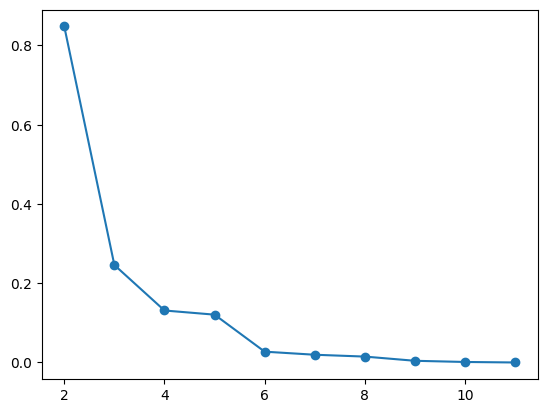

In [11]:
plt.plot(ks,inertias, marker='o')

Elbow method (metod lakat) - najveci pad SSE se nalazi izmedju $k=2$ i $k=3$, ali postoji veliki pad i za $k=3$ i $k=4$ koji je dosta veci nego za npr. $k=7$ i $k=8$. Vidimo na grafiku da zapravo nagli pad prestaje za $k=4$

Na osnovu plot-ova za _k_ vidimo i da je optimalno izabrati $k=3$.

In [12]:
kmeans = KMeans(n_clusters=2, n_init='auto')

❔ Zašto ne vršimo podelu podataka na trening i test?

Ne vršimo tradicionalnu podelu podataka na trening i test skupove jer algoritam nije usmeren na predviđanje i generalizaciju, već na grupisanje podataka na osnovu sličnosti.

In [13]:
kmeans.fit(X)

KMeans(n_clusters=2)

Sada ćemo da vizuelizujemo rezultate koje smo dobili. Neke bitne informacije su nam:
   
   * Koja instanca pripada kom klasteru
   * Vrednosti centroida za svaki od klastera
   * Kolika je SSE

In [14]:
# koja instanca pripada kom klasteru
kmeans.labels_

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [15]:
# prikaz instanci koje pripadaju 0. klasteru nad skaliranim podacima
X[kmeans.labels_ == 0]

,height,weight
0,0.538462,0.248366
2,0.461538,0.183007
3,0.807692,0.738562
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


In [16]:
# priakz instanci koje pripadaju 0. klasteru na pocetnom skupu podataka (pre skaliranja)
dogs[kmeans.labels_ == 0]

,breed,height,weight
0,Border Collie,20,45
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
5,German Shepherd,25,78
6,Golden Retriever,23,70
7,Great Dane,32,160
8,Portuguese Water Dog,21,50
9,Standard Poodle,19,65


In [17]:
# centoridi
kmeans.cluster_centers_

array([[0.65865385, 0.46323529],
       [0.15384615, 0.03050109]])

In [18]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)
centers

,height,weight
0,0.658654,0.463235
1,0.153846,0.030501


In [19]:
# centroidi na pocetnoj skali (pre skaliranja podataka)
scaler.inverse_transform(kmeans.cluster_centers_)

array([[23.125     , 77.875     ],
       [10.        , 11.66666667]])

In [20]:
# SSE - suma kvadrata rastojanja
kmeans.inertia_

0.8479588365514269

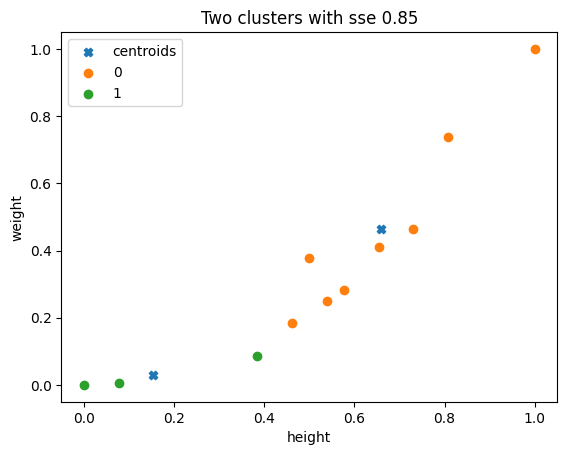

In [21]:
plt.scatter(centers['height'], centers['weight'], marker='X', label='centroids')

for c in np.unique(kmeans.labels_):
    elems = X[kmeans.labels_ == c]
    plt.scatter(elems['height'], elems['weight'], label=c)

plt.xlabel('height')
plt.ylabel('weight')
plt.title('Two clusters with sse {}'.format(round(kmeans.inertia_, 2)))
plt.legend()
plt.show()
    

Detaljnijim pregledom klastera, vidimo da su u jednom klasteru velike rase, a u drugom srednje i male rase.

In [22]:
dogs[kmeans.labels_ == 1]

,breed,height,weight
1,Boston Terrier,16,20
4,Chihuahua,8,8
10,Yorkshire Terrier,6,7


In [23]:
dogs[kmeans.labels_ == 0]

,breed,height,weight
0,Border Collie,20,45
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
5,German Shepherd,25,78
6,Golden Retriever,23,70
7,Great Dane,32,160
8,Portuguese Water Dog,21,50
9,Standard Poodle,19,65


### Silhouette coefficient (koeficijent senke)

**Cohesion** - meri koliko su bliski(slični) objekti iz istog klastera (npr. SSE)

**Separation** - meri koliko su različitit objekti iz različitih klastera (npr. SE)

**Silhouette coefficient** je popularan metod evaluacije klastera koja kombinuje koheziju i separaciju.

Koeficijent senke se računa za svaku instancu pojedinačno, na sledeći način:

**1.** Za $i$-tu instancu računamo usrednjeno rastojanje od svih instanci iz istog klastera (Umesto rastojanja može da se koriste i druge mere različitosti). Obeležimo izračunatu vrednost sa $a_i$.

**2.** Za $i$-tu instancu i sve klastere koji ne sadrže $i$-tu instancu računamo usrednjeno rastojanje $i$-te instance od svih elemenata iz svakog od tih klastera. Pronalazimo minimalno rastojanje i obeležimo ga sa $b_i$.

**3.** silhouette coefficient za $i$-tu instancu računamo : $s_i = \frac{b_i - a_i}{max(a_i, b_i)}$

Vrednosti $s_i$ se nalazi u rasponu od -1 do 1. Negativne vrednosti nisu poželjne, pošto odgovaraju slučaju kada je $a_i > b_i$, tj. da je usrednjeno rastojanje između instanci u klasteru veće nego minimalno usrednjeno rastojanje 
od instanci iz drugih klastera.

Težimo da koeficijent senke bude pozitivan ($a_i < b_i$) i da $a_i$ bude što bliži 0.

Silhouette coefficient klastera računamo kao srednju vrednost $s_i$ instanci iz klastera.


Kao ukupna mera kvaliteta klasterovanja se dobija usrednjavanjem $s_i$ svih instanci.

In [24]:
from sklearn.metrics import silhouette_samples

silhouette_values = silhouette_samples(X, kmeans.labels_)
silhouette_values

array([ 0.28981652,  0.242704  , -0.12137722,  0.53267774,  0.73560541,
        0.57851663,  0.56163616,  0.43579723,  0.40507931,  0.39309297,
        0.71035336])

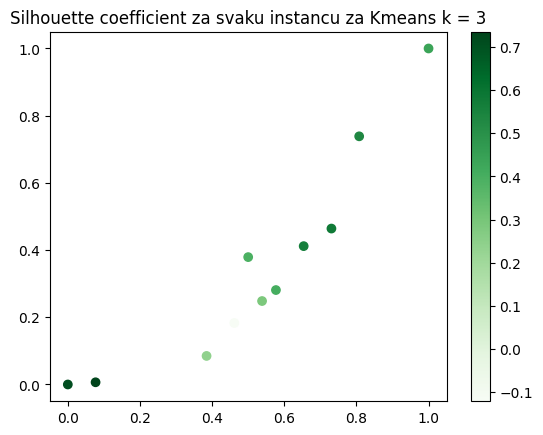

In [25]:
plt.scatter(X['height'], X['weight'], c = silhouette_values, cmap="Greens")
plt.colorbar()
plt.title("Silhouette coefficient za svaku instancu za Kmeans k = 3")
plt.show()

### ❗❗❗Izbor broja klastera

Jedan od glavnih izazova pri korišćenju Kmeans je izbor broja klastera.

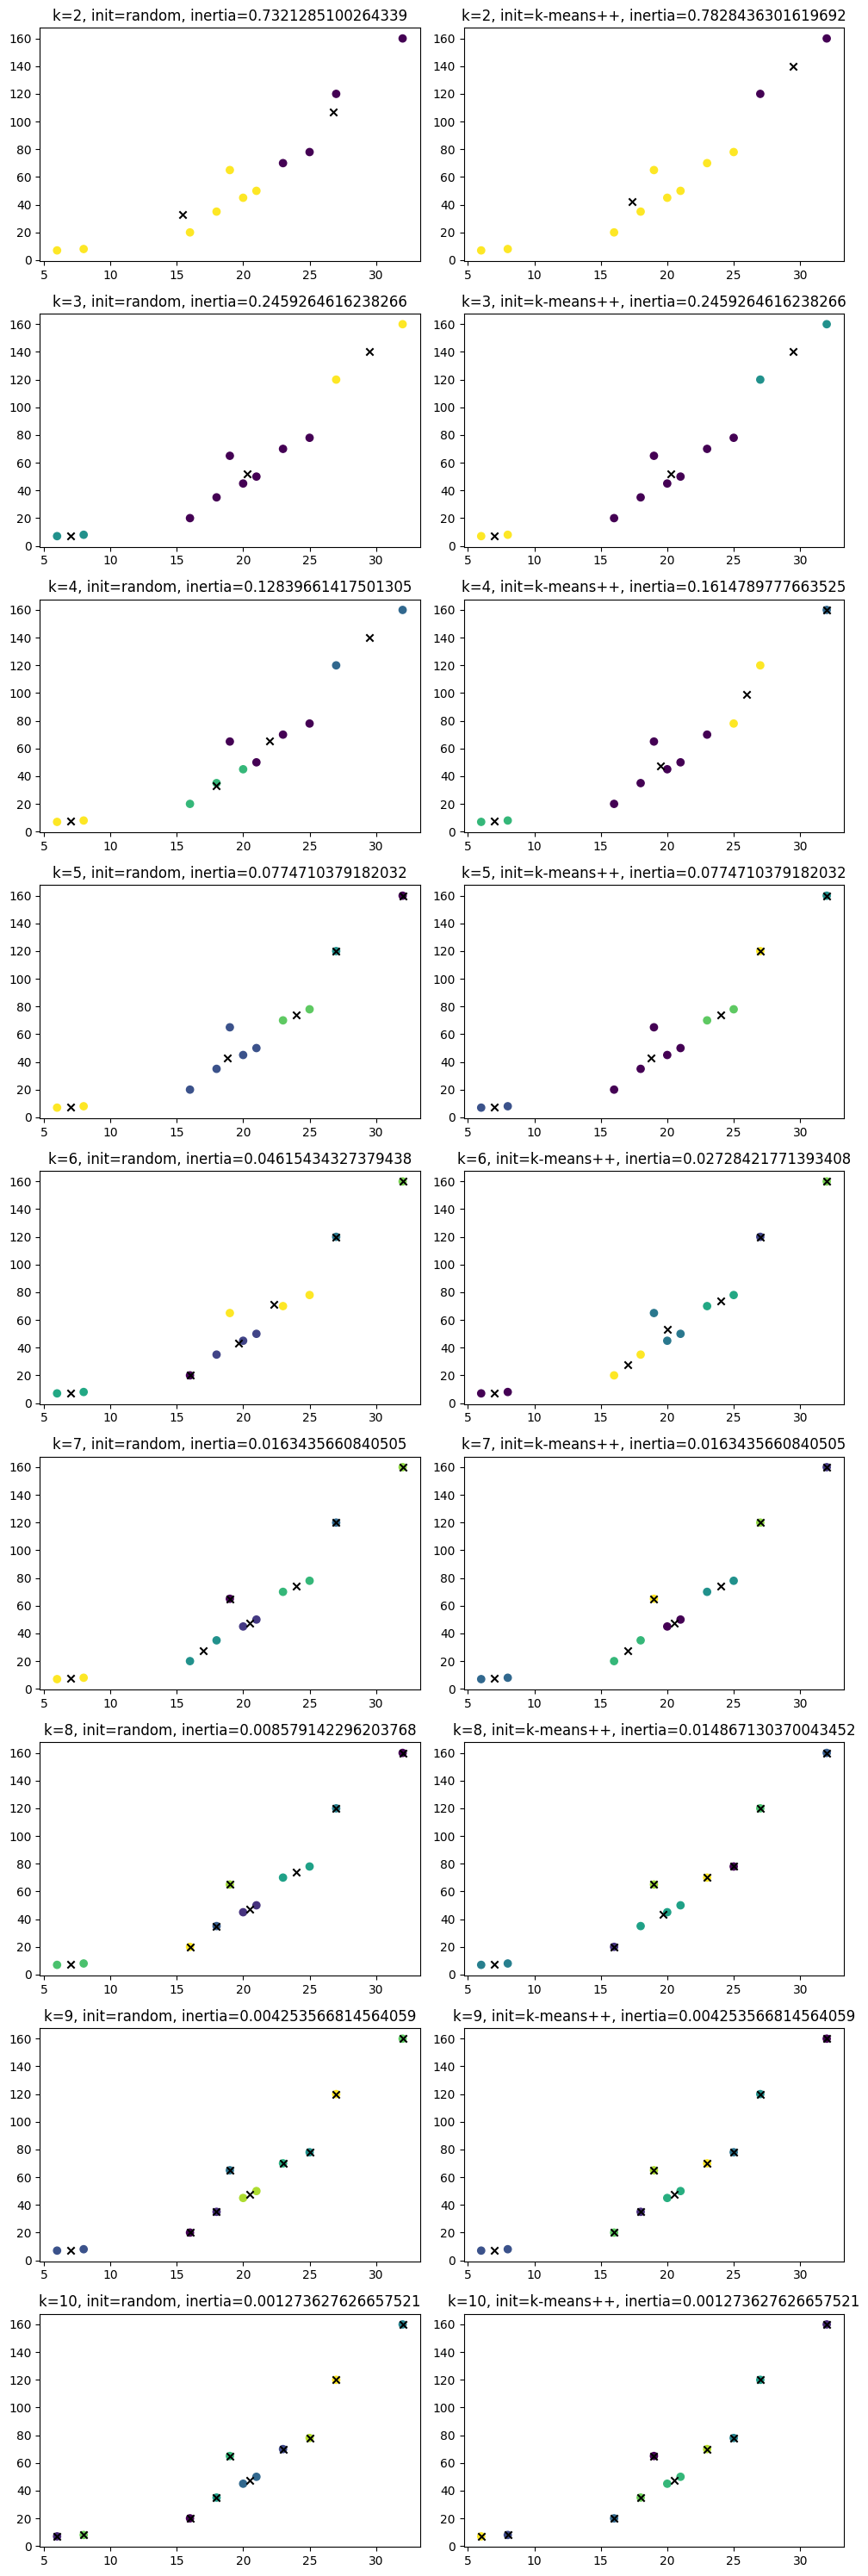

In [26]:
from sklearn.metrics import silhouette_score
ks = range(2, X.shape[0]) # [)
inits = ['random', 'k-means++']
fig = plt.figure(figsize=(10,30))
idx = 1
silhouette = []
inertias = []
for k in ks:
    for init in inits:
        kmeans = KMeans(n_clusters=k, init=init, n_init='auto')
        kmeans.fit(X)
        if init == 'k-means++':
            inertias.append(kmeans.inertia_)
            silhouette.append(silhouette_score(X, kmeans.labels_))

        fig.add_subplot(len(ks), len(inits), idx)
        idx += 1
        
        # for label in range(k):
        #     cluster = dogs[kmeans.labels_ == label]
        #     plt.scatter(cluster['height'], cluster['weight'])

        plt.scatter(dogs['height'], dogs['weight'], c = kmeans.labels_)
        
        centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=feature_names) #Undo the scaling of X (prikazujemo kmeans.cluster_centers_ prema pocetnoj skali, bez skaliranja)
        plt.scatter(centroids['height'], centroids['weight'], color='black', marker='x')
            
        plt.title(f'k={k}, init={init}, inertia={kmeans.inertia_}')
        
plt.tight_layout()

# Napomena:
# ks = range(2, X.shape[0]) # [2,11) <=> [2,10]
# silhouette_score: Number of labels is 11. Valid values are 2 to n_samples - 1 (inclusive)
# inace bi range mogli da postavimo i na:
# ks = range(1, X.shape[0] + 1) # [1,12) <=> [1,11]
# Time prikazali kada svih 11 instanci pripadaju jednom klasteru,
# kao i da svaka od 11 instanci predstavlja klaster za sebe (11 klastera)


Cilj je da minimizujemo SSE(inertia). 
Sa porastom broja klastera, SSE se smanjuje, jer će instance biti bliže centroidama. SSE je najmanja kada je broj klastera jednak broju instnci (svaki klaster sadrži po 1 instancu). 
Sa obzirom na ovu informaciju, potrebno je da odredimo minimalan broj klastera takav da je razumna vrednost SSE.

### Pravilo lakta (Elbow method) vs Silhouette coefficient

Jedan od najpoznatijih metoda je **pravilo lakta**. Prvo vizuelizujemo promenu SSE. Biramo broj klastera $k$ na "laktu", tj. u tački gde SSE najbrže opadne. Na osnovu grafika ispod, izabrali bismo k=3.

Problem koji se javlja prilikom korišćenja ove heuristike je što se klasteri koji su jako blizu spajaju u jedan (jer njihovim razdvajanjem SSE neće mnogo opasti).

Za rešenje ovog problema se koristi Silhouette coefs. Na slici desno je vizuelizovana promena silhouette coefs u odnosu na promenu broja klastera. Znamo da težimo što većim vrednostima, koje signaliziraju da je dobra koherencija unutar klastera, kao i separacija između klastera. 

Ako smo možda kod metoda lakta mogli da diskutujemo da li je bolje izabrati vrednost k=3 ili k=4, korišćenjem silhouette coefs je očigledno da je optimalno k=3.



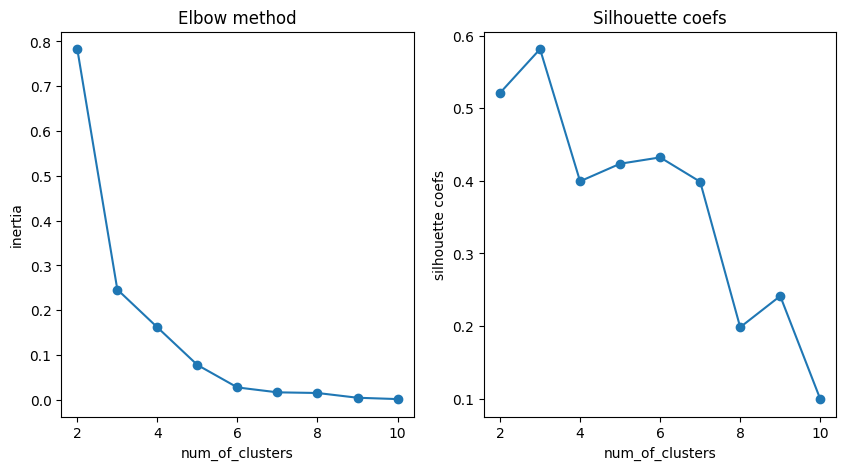

In [27]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(ks, inertias, marker='o')
plt.ylabel('inertia')
plt.xlabel('num_of_clusters')
plt.title('Elbow method')

plt.subplot(1, 2, 2)
plt.plot(ks, silhouette, marker="o")
plt.ylabel('silhouette coefs')
plt.xlabel('num_of_clusters')
plt.title('Silhouette coefs')

plt.show()

#### Silhouette Diagram
Još detaljnija vizuelizacija je silhouette dijagram koji se dobija vizuelizacijom _silhouette coef_ za svaku instancu klastera, sortirane opadajuće.
Debljina svakog klastera nam daje informaciju o veličini klastera, a širina o silhouette skoru svake instance (što je šira to je bolje).

Dodatna informacija je i isprekidana linija koja predstavlja shilouette score svih klastera. 

For n_clusters = 2 The average silhouette_score is : 0.5210272444296898
For n_clusters = 3 The average silhouette_score is : 0.5813924452451538
For n_clusters = 4 The average silhouette_score is : 0.4276472724830383
For n_clusters = 5 The average silhouette_score is : 0.42356634638256535


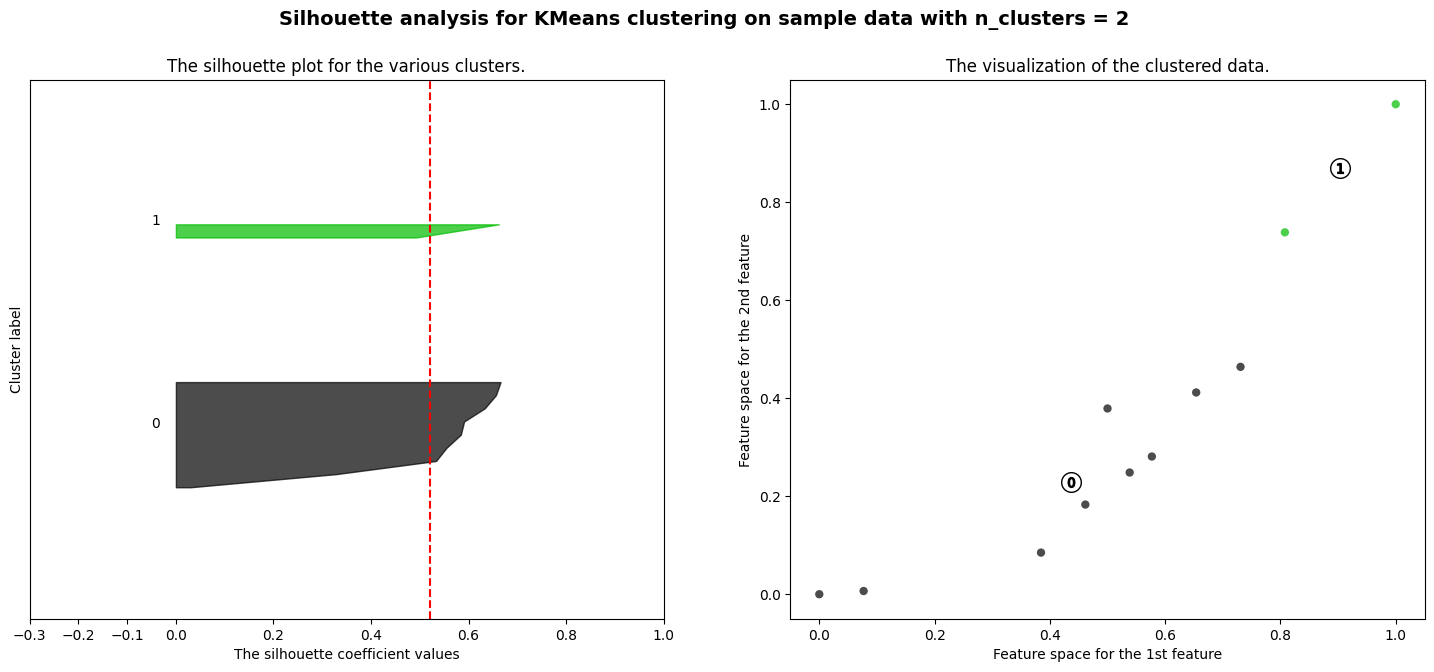

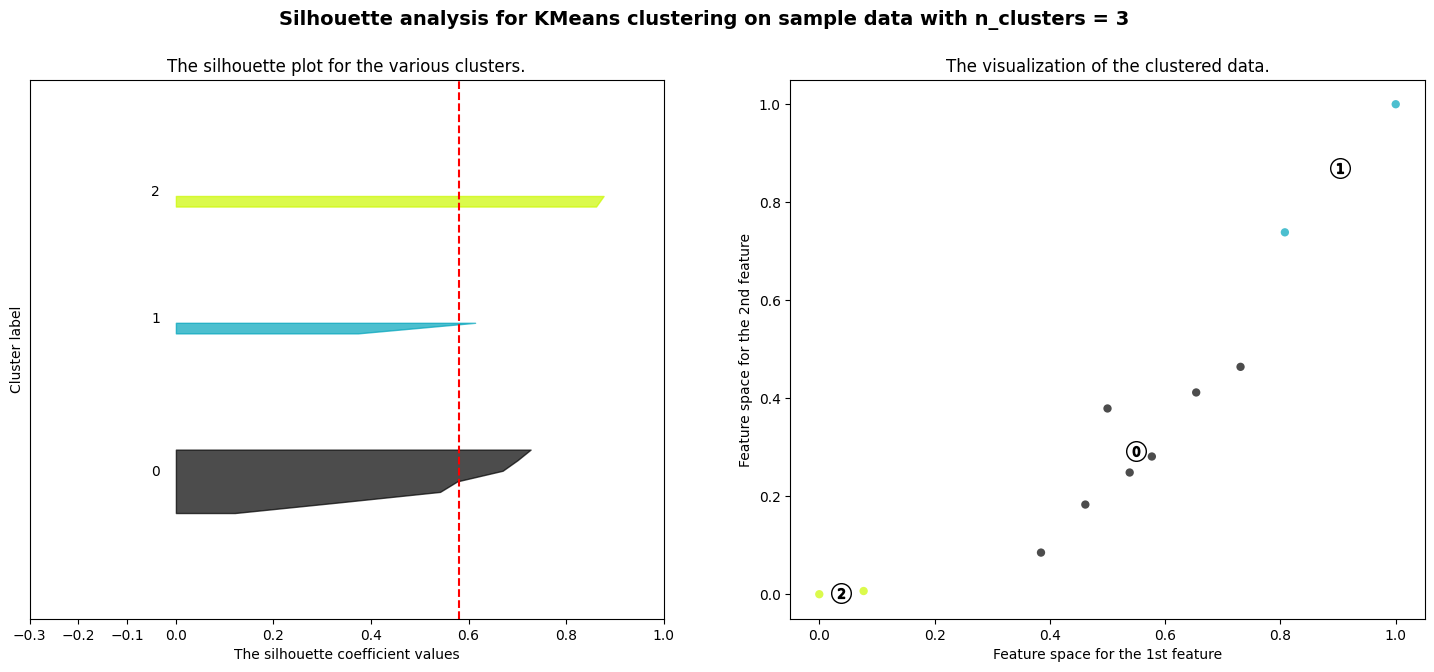

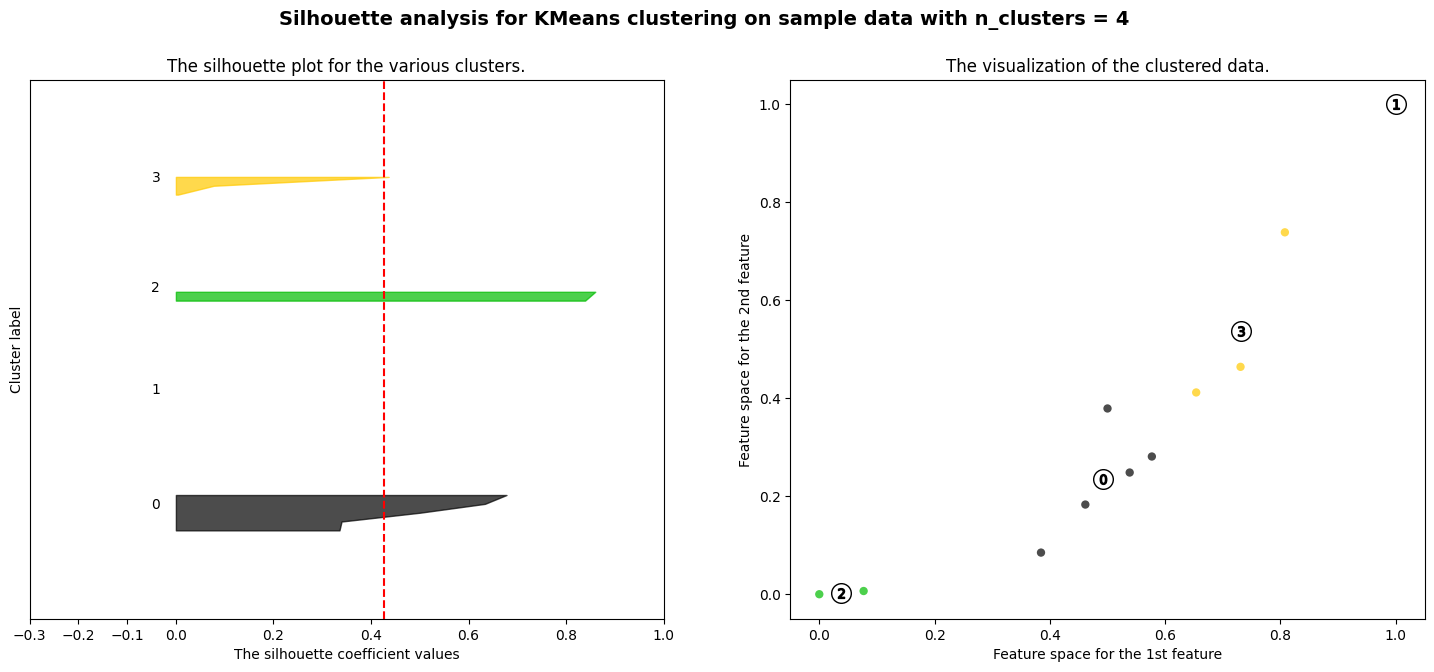

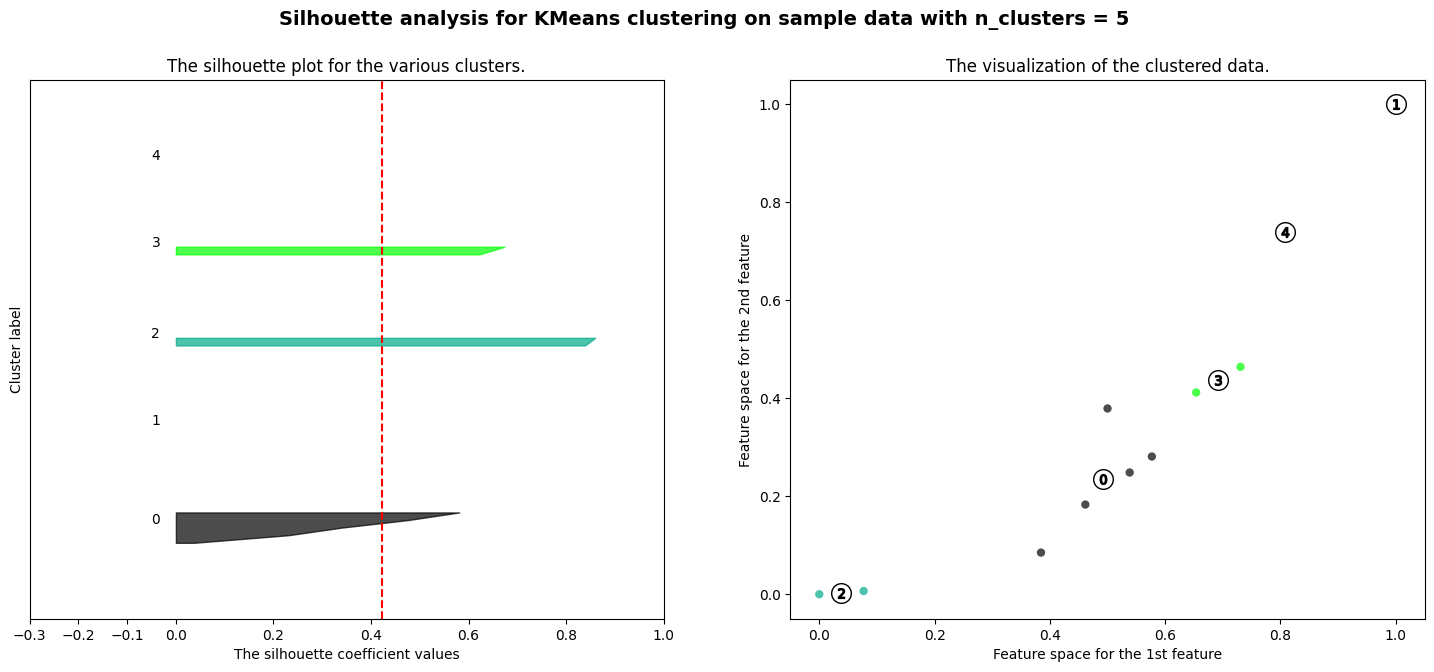

In [28]:
# pomoćna funkcija za silhouette diagram plot (preuzeto sa https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
import matplotlib.cm as cm

for n_clusters in [2, 3, 4, 5]:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.3, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X['height'], X['weight'], marker="o", lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Sa leve strane se nalazi silhouette diagram, a sa desne su prikazani klasteri.
Ako posmatramo za k=2, možemo primetiti da je klaster 1 znatno veći od klastera 0.
Ako povećamo na k=3, dobijamo bolje rezultate. Ako sada posmatramo k=4, možemo primetiti da je silhouette score opao, kao i da se u klasteru 0 većina instanci nalazi sa leve strane isprekidane linije (silhouette score je manji od sr. vrednosti), čak i da je za neke instance manji od 0 (što znači da je došlo do pogrešnog razdvajanja klastera). Ovim smo još sigurniji da je k=3 najbolji izbor.

## Primer 2 - kompresija slike 

Još jedan primer upotrebe klasterovanja.
Ako želimo da kompresujemo sliku možemo smanjiti broj boja koje koristimo za prikaz.

Slika u boji predstavlja matricu piksela, koji je opisan sa 3 kanala (rgb).  Svaki piksel posmatramo kao 1 instancu i izvršimo klasterovanje u _k_ grupa. 

Nakon toga, svaki piksel zamenjujemo centroidom klastera kome pripada.

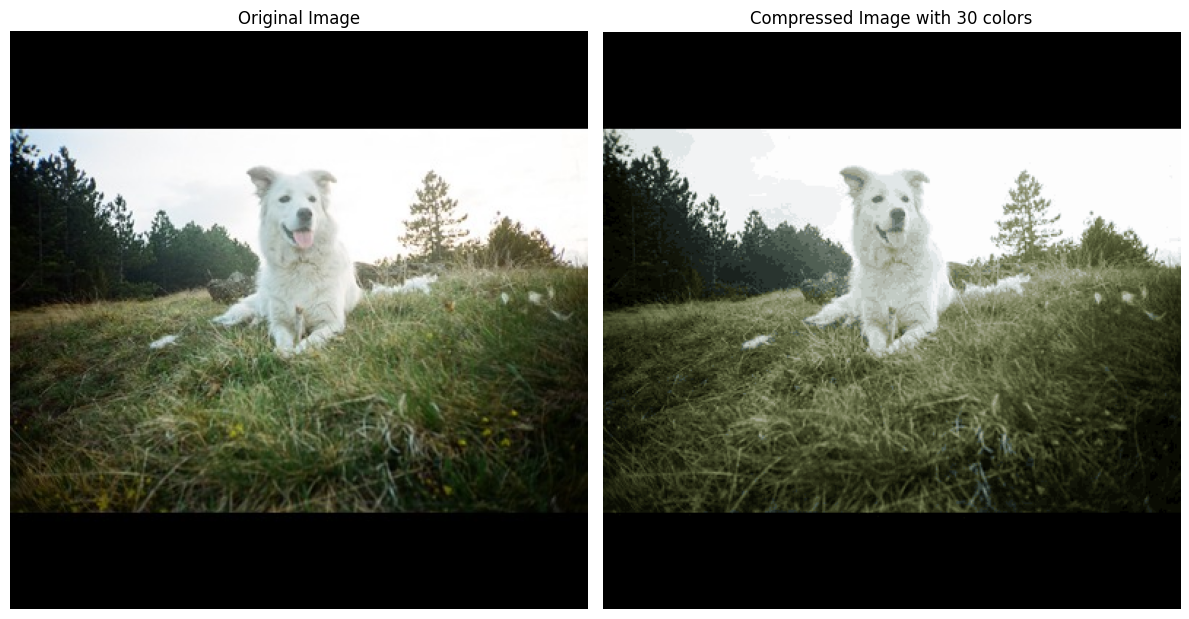

In [29]:
from matplotlib.image import imread
import pandas as pd
import seaborn as sns

img = imread('img/masa.jpg')
img_size = img.shape


X_img = img.reshape(img_size[0] * img_size[1], img_size[2])


km = KMeans(n_init='auto', n_clusters=30)
km.fit(X_img)


X_compressed = km.cluster_centers_[km.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 30 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();

## Bisecting K-means

Bisecting K-means algorithm se zasniva na ideji: Prvo podeliti instance u 2 klastera, zatim izabrati jedan od postojećih i podeliti ga na 2 klastera. Proces se ponavlja dok se ne formira $k$ klastera.

Izbor klastera za podelu se može izvršiti na više načina: možemo izabrati najveći klaster, klaster sa najvećom SSE ili kriterijum koji se zasniva na SSE i veličini. Ova odluka utiče na rezultujuće klastere.

Često se rezultujuće centroide Bisecting K-means algoritma koriste kao inicijalne centroide za klasičan K-means pronalazi algoritam. Ovaj korak je potreban pošto K-means pronalazi klastere koji predstavljaju lokalni minimum u odnosu na SSE, dok kod Bisecting K-means Kmeans koristimo samo lokalno, za podelu izabranog klastera. Dakle, finalni skup klastera nije klasterovanje koje predstavlja lokalni minimum u odnosu na SSE (na početku sveske smo definisali klasterovanje kao minimizacioni problem SSE).



In [30]:
from sklearn. cluster import BisectingKMeans
bkmeans = BisectingKMeans(n_clusters=3,bisecting_strategy='largest_cluster')
bkmeans

BisectingKMeans(bisecting_strategy='largest_cluster', n_clusters=3)

###### Pomoćna funkcija za vizuelizaciju klasterovanja

In [31]:
def visualize_clustering(data, centers, labels, feature_names, alg_name):
    plt.scatter(centers[:, 0], centers[:, 1], marker='X', label='centroids', color="black")

    for c in np.unique(labels):
        elems = X[labels == c]
        plt.scatter(elems[feature_names[0]], elems[feature_names[1]], label=c)

    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[0])
    plt.title('{} {} clusters'.format(alg_name, len(centers)))
    plt.legend()


In [32]:
bkmeans.fit(X)

BisectingKMeans(bisecting_strategy='largest_cluster', n_clusters=3)

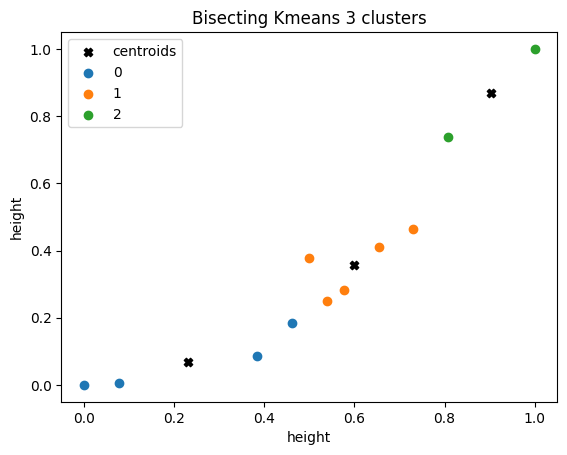

In [33]:
visualize_clustering(X, bkmeans.cluster_centers_, bkmeans.labels_, X.columns, "Bisecting Kmeans")

## Fuzzy C - Means

Svi algoritmi sa kojima smo se do sada upoznali su **hard clustering**, tj. jedna tačka pripada najviše jednom klasteru. 
Nasuprot tome, postoje i **soft clustering** algoritmi koji dozvoljavaju da tačke pripadaju istovremeno većem broju klastera sa različitim stepenom pripadnosti (membership degree/value).

Fuzzy C-means (FCM) je jedan predstavnik soft clustering algoritama. C-means u nazivu označava $c$ centroida (identično kao kod K-means).

Kod Fuzzy C-means metoda, imamo **dva parametra** : $\mu_{ij}$ i $c_i$ i **hiper-parametare** : c i m.

* $\mu_{ij}$ - **membership degree/value (stepen pripadnosti)** - verovatnoća da $j$-te instanca pripada $i$-tom klasteru.
Ograničenja:
    
    * $\mu_{ij} \in [0, 1]$   $\forall i, j$
     
    
    * $\sum_{i=1}^{c} \mu_{ij} = 1$  $\forall j$
 

* $c_i$ - centroide za svaki klaster

* $m >= 1$ - fuzzifier - kontroliše koliko će granice klastera biti fuzzy.

---
  
Za običan _K_means_ bi važilo:
   * $\mu_{ij} \in \{0, 1\}$   $\forall i, j$

### Minimizacioni problem

You can understand the objective function as a weighted sum of the distance between the data points (X_j) and the cluster centers (C_i). The “distance” term is the L2 norm in the equation above, and in the example

$ J = \sum_{i=1}^{C}\sum_{j=1}^{N}\mu_{ij}^md(x_j, c_i)$, gde je

$C$ - broj klastera
$N$ - broj instanci 
$x_j$ - $j$-ta instanca
$c_i$ - centroida za $i$-ti klaster
$d$ - rastojanje, npr. L2 norma (euklidsko rastojanje)

Formula predstavlja _težinsku sumu_ rastojanja između tačaka iz podataka ($x_j$) i centroide klastera ($c_i$).

Suma je "otežana" sa $\mu{ij}^m$. Pošto minimizujemo $J$, za bliže instance centroidi imamo veće vrednosti $\mu_{ij}$. Zato nam je bitan i hiper-parametar $m$.  Ako za vrednost m uzmemo jako velike vrednosti, rastojanje više nema veliki uticaj (jer je $\mu_{ij}^m$ blisko 0) i sve centroide će se nalaziti oko centra svih podataka - time se onda sve tačke nalaze u velikom broju klastera. 

Dakle, intuitivno, za veliko $m$ - instance pripadaju većem broju klastera, za malo $m$ - instance pripadaju malom broju klastera.

#### Pronalazak parametara koji minimizuju J 

[Litetatura sa izvođenjem formula.](https://www.sciencedirect.com/science/article/abs/pii/0098300484900207)

Ostalo je još pitanje pronalaska parametara $c_i$ i $\mu_{ij}$ koji minimizuju $J$:

* $c_i = \frac{\sum_{j=1}^N \mu_{ij}^mxj}{\sum_{j=1}^N \mu_{ij}^m}$
* $\mu_{ij} = \frac{1}{\sum_{k=1}^{C}(\frac{||x_j-c_i||}{||x_j-c_k||})^{\frac{2}{m-1}}}$

Dakle, Fuzzy C means iterativno ažurira $c_i$ i $\mu_{ij}$ sve dok promene centroida u dve uzastopne iteracije nije manja od unapred određene granice.

In [34]:
#!pip install scikit-fuzzy

U narednom primeru ćemo prikazati korišćenje FCM. Nakon podešavanja parametara c i m, određujemo klastere.

In [35]:
#!pip install fuzzy-c-means
from fcmeans import FCM

In [36]:
fcm = FCM(n_clusters=3, m=3) # instanciranje: +0.5p 25.04.2024. 
fcm.fit(X.to_numpy())

In [37]:
# Soft labele - stepen pripadnosti klasteru
fcm.soft_predict(X.to_numpy())

array([[0.06353995, 0.84848329, 0.08797676],
       [0.13563229, 0.46979655, 0.39457115],
       [0.11867266, 0.65349433, 0.22783301],
       [0.66053423, 0.22836537, 0.1111004 ],
       [0.01011687, 0.02175476, 0.96812837],
       [0.2900989 , 0.546968  , 0.1629331 ],
       [0.18723839, 0.67246536, 0.14029624],
       [0.7745561 , 0.14009141, 0.08535249],
       [0.03858015, 0.91571899, 0.04570086],
       [0.11279159, 0.75883017, 0.12837824],
       [0.04528849, 0.09083995, 0.86387156]])

FCM možemo koristiti i za hard clustering, kada svaku instancu dodelimo jednom klasteru (onom za koji je stepen pripadnosti najveći).

In [38]:
# hard clustering - dodeljivanje tacno jednom klasteru
labels = fcm.predict(X.to_numpy())

In [39]:
centers = fcm.centers

Na osnovu vizuelizacije ispod, vidimo da smo dobili slične centroide kao sa K-means ili Bisecting K-means.

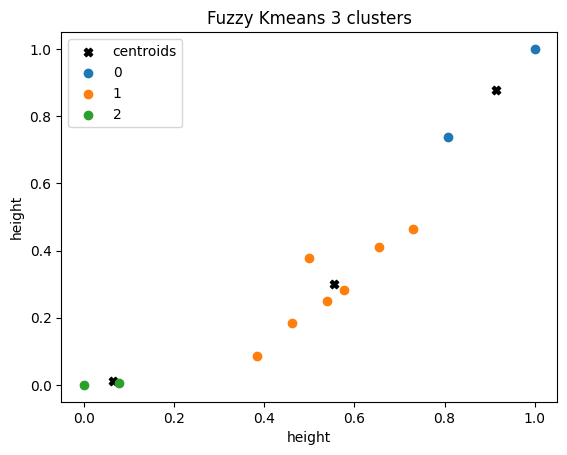

In [40]:
visualize_clustering(X, fcm.centers, fcm.predict(X.to_numpy()), X.columns, "Fuzzy Kmeans")
plt.show()

Da bismo dobili informacije o stepenu pripadnosti različitim klasterima, koristićemo soft_predict.

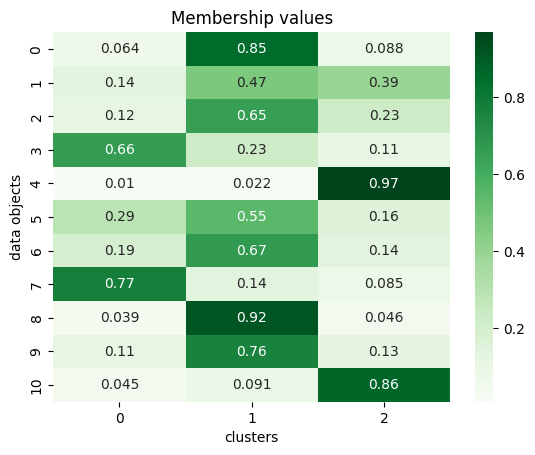

In [41]:
import seaborn as sns
sns.heatmap(fcm.soft_predict(X.to_numpy()), cmap='Greens', annot=True)
plt.title("Membership values")
plt.xlabel('clusters')
plt.ylabel('data objects')
plt.show()

 Pitanje? Da li gore pokazanim heuristikama za hard clustering možemo da biramo broj klastera za fuzzy c means?
 [Dodatna literatura](https://ieeexplore.ieee.org/document/6412415).